In [2]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [29]:
path = 'DataLink 2022 Selected Datasets/'

traffic_file = '21. NY - Traffic_Volume_Counts__2014-2019_.csv'

df_traffic = pd.read_csv(path+traffic_file)

print(df_traffic.describe())

# We notice that there are some values missing: some slots have 27285 values and some 27289



                 ID    Segment ID  12:00-1:00 AM   1:00-2:00AM   2:00-3:00AM  \
count  27289.000000  2.728900e+04   27285.000000  27285.000000  27285.000000   
mean     178.367584  6.460915e+05     294.463955    208.562800    156.573355   
std      107.494863  2.155932e+06     460.922628    337.987268    264.599920   
min        1.000000  2.020000e+02       0.000000      0.000000      0.000000   
25%       85.000000  3.504100e+04      67.000000     42.000000     30.000000   
50%      172.000000  8.169400e+04     132.000000     89.000000     64.000000   
75%      272.000000  1.481960e+05     283.000000    203.000000    151.000000   
max      372.000000  9.017050e+06    4805.000000   3841.000000   3867.000000   

        3:00-4:00AM   4:00-5:00AM   5:00-6:00AM   6:00-7:00AM   7:00-8:00AM  \
count  27285.000000  27285.000000  27285.000000  27285.000000  27285.000000   
mean     136.433058    160.225325    248.728972    418.841195    563.831592   
std      234.929296    282.590405    487.4

In [30]:
# Let's investigate this a bit further
print(f'Total tuples : %d'%(df_traffic.shape[0]))

print(f'Total missing values : %d '%(df_traffic.isnull().sum().sum()))


Total tuples : 27289
Total missing values : 44 


In [31]:
# In that case, dropping the tuples might be a possibility, where inputting is not necessary considering the
# low number of NaNs, and the fact that they are equally shared on different times

df_traffic.dropna(inplace= True)
print(f'Total missing values now : %d '%(df_traffic.isnull().sum().sum()))

Total missing values now : 0 


<AxesSubplot:>

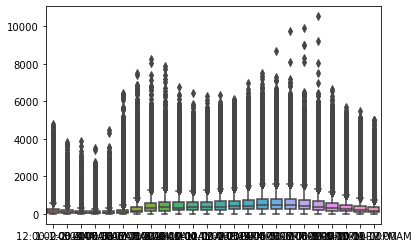

In [36]:
# Let's now plot the different times and their associated traffic:
import seaborn as sns

#df_plot = df_traffic.drop(['Segment ID'],axis = 1)
#df_plot = df_plot.drop(['ID'],axis = 1)
#plt.box(df_traffic)
sns.boxplot(data=df_plot)

# We can observe that there is no particular tendency in terms of time (apart from the fact)
# that the traffic is slightly more important during the day than during the night.

# However, by observing the outliers, we can clearly conclude that some particular segments 
# are spiking in terms of traffic on two particular times: around 8am and 5pm.

# Let's take a deeper dive into it

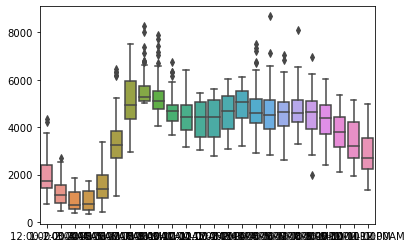

In [57]:
df_trafficplus78 = df_plot.where(df_plot['7:00-8:00AM']>5000)
sns.boxplot(data=df_trafficplus78)

heavy_78am = df_traffic[df_traffic['7:00-8:00AM']>5000]['Segment ID'].values

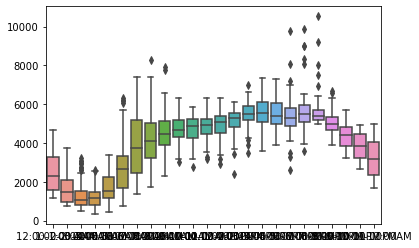

In [58]:
df_trafficplus78pm = df_plot.where(df_plot['7:00-8:00PM']>5000)
sns.boxplot(data=df_trafficplus78pm)

heavy_78pm = df_traffic[df_traffic['7:00-8:00PM']>5000]['Segment ID'].values

In [83]:
# Let's compare how similar are the segments creating the traffic in the morning and in the evening:
from collections import Counter


min_size = min(len(heavy_78am),len(heavy_78pm))
tot = 0
bad_seg=[]

for i in heavy_78am:
    for a in heavy_78pm:
        if(i == a):
            bad_seg.append(i)
bad_seg = np.array(bad_seg)
bad_seg = np.unique(bad_seg)
perc = bad_seg.shape[0]

print(f'Number of similar segments under high traffic both during the morning rush hour \
                            and during the evening rush our:%d '%(perc))

print('The bad segments are: ',bad_seg)

Number of similar segments under high traffic both during the morning rush hour                             and during the evening rush our:8 
The bad segments are:  [ 137522  139303  139657  142386  193991 9012150 9012249 9013082]


Conclusion: We know which segment to target!